In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [3]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
count = 0
for layer in resnet.layers:
    layer.trainable = False
    count += 1

In [6]:
count

175

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [6]:
folders

['Datasets/Datasets/train\\Lymphocytes',
 'Datasets/Datasets/train\\Promyelocytes',
 'Datasets/Datasets/train\\Segmented Neutrophils']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 511 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 37 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
16/16 [==============================] - 67s 4s/step - loss: 7.0150 - accuracy: 0.3718 - val_loss: 2.0991 - val_accuracy: 0.3243
Epoch 2/50
16/16 [==============================] - 59s 4s/step - loss: 3.2412 - accuracy: 0.3777 - val_loss: 1.9412 - val_accuracy: 0.6216
Epoch 3/50
16/16 [==============================] - 59s 4s/step - loss: 1.6098 - accuracy: 0.4325 - val_loss: 1.0955 - val_accuracy: 0.4865
Epoch 4/50
16/16 [==============================] - 59s 4s/step - loss: 1.0142 - accuracy: 0.5108 - val_loss: 1.1076 - val_accuracy: 0.4595
Epoch 5/50
16/16 [==============================] - 59s 4s/step - loss: 0.8595 - accuracy: 0.6458 - val_loss: 0.5441 - val_accuracy: 0.8378
Epoch 6/50
16/16 [==============================] - 59s 4s/step - loss: 0.6768 - accuracy: 0.7221 - val_loss: 0.5361 - val_accuracy: 0.7838
Epoch 7/50
16/16 [==============================] - 57s 4s/step - loss: 0.8178 - accuracy: 0.6595 - val_loss: 0.4321 - val_accuracy: 0.9189
Epoch 8/50
16/16 [==

In [42]:
r.history

{'loss': [7.015007019042969,
  3.2411556243896484,
  1.609810471534729,
  1.0142147541046143,
  0.8594744801521301,
  0.6768103241920471,
  0.8177692890167236,
  0.6431403160095215,
  0.5735422372817993,
  0.5605964064598083,
  0.5614750385284424,
  0.4744795262813568,
  0.48096776008605957,
  0.499077171087265,
  0.46386879682540894,
  0.4837878942489624,
  0.6136612892150879,
  0.8219000101089478,
  0.6018136143684387,
  0.3807554244995117,
  0.4001126289367676,
  0.39909622073173523,
  0.3519579768180847,
  0.3321286737918854,
  0.381106436252594,
  0.5630961060523987,
  0.4562273323535919,
  0.36175066232681274,
  0.2896212041378021,
  0.3697938919067383,
  0.38481977581977844,
  0.41089171171188354,
  0.3151184022426605,
  0.3107375502586365,
  0.3467033803462982,
  0.3902468681335449,
  0.3609190285205841,
  0.3740045130252838,
  0.24729087948799133,
  0.35296347737312317,
  0.3620986342430115,
  0.2466459721326828,
  0.2858617901802063,
  0.2872360646724701,
  0.2444954067468643

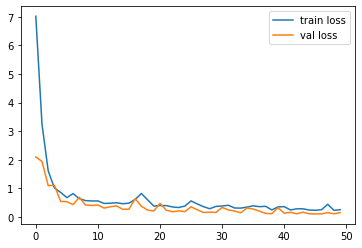

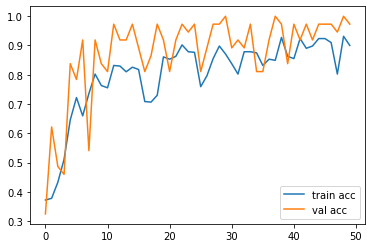

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [45]:

y_pred = model.predict(test_set)


In [46]:
y_pred

array([[9.23960090e-01, 6.27789088e-03, 6.97619542e-02],
       [8.90219398e-03, 9.59880054e-01, 3.12177557e-02],
       [1.61567070e-02, 4.08069427e-05, 9.83802438e-01],
       [9.58632350e-01, 1.72755762e-03, 3.96401100e-02],
       [6.30823313e-04, 9.99005139e-01, 3.64071195e-04],
       [3.00111622e-01, 5.42214394e-01, 1.57673940e-01],
       [5.87674556e-03, 9.92273271e-01, 1.84986857e-03],
       [1.87689245e-01, 7.37681389e-01, 7.46293962e-02],
       [3.62052053e-01, 3.98187386e-03, 6.33966029e-01],
       [5.56720328e-03, 9.94185507e-01, 2.47379445e-04],
       [1.45750595e-02, 9.82338071e-01, 3.08688660e-03],
       [8.55647251e-02, 1.00188379e-04, 9.14335132e-01],
       [9.73771155e-01, 2.72319582e-03, 2.35056598e-02],
       [2.23941237e-01, 7.66084254e-01, 9.97449458e-03],
       [4.23269905e-02, 1.43688906e-03, 9.56236124e-01],
       [2.27208659e-02, 9.60315347e-01, 1.69637445e-02],
       [7.32151372e-03, 9.92544055e-01, 1.34420086e-04],
       [1.86562967e-02, 3.09444

In [47]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [48]:
y_pred

array([0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0], dtype=int64)

In [49]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [50]:
model=load_model('model_resnet50.h5')

In [73]:
img=image.load_img('Datasets/Datasets/Test/Segmented Neutrophils/SNE_10863929.jpg',target_size=(224,224))



In [74]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\junnajamshed\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

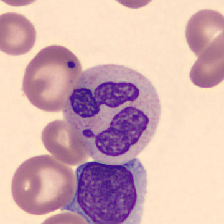

In [75]:
img

In [76]:
x=image.img_to_array(img)
x

array([[[235., 197., 184.],
        [214., 170., 167.],
        [193., 140., 156.],
        ...,
        [250., 221., 203.],
        [249., 220., 202.],
        [248., 219., 201.]],

       [[255., 227., 201.],
        [244., 211., 194.],
        [223., 184., 179.],
        ...,
        [250., 222., 201.],
        [250., 222., 201.],
        [249., 221., 200.]],

       [[254., 232., 195.],
        [255., 232., 198.],
        [249., 223., 196.],
        ...,
        [251., 223., 201.],
        [251., 223., 201.],
        [249., 221., 199.]],

       ...,

       [[253., 227., 200.],
        [254., 228., 201.],
        [255., 229., 202.],
        ...,
        [254., 230., 204.],
        [254., 230., 202.],
        [254., 230., 202.]],

       [[255., 230., 199.],
        [255., 230., 200.],
        [255., 229., 202.],
        ...,
        [255., 229., 204.],
        [255., 229., 204.],
        [255., 229., 204.]],

       [[255., 230., 199.],
        [255., 230., 200.],
        [255., 2

In [77]:
x.shape

(224, 224, 3)

In [78]:
x=x/255

In [79]:
x

array([[[0.92156863, 0.77254903, 0.72156864],
        [0.8392157 , 0.6666667 , 0.654902  ],
        [0.75686276, 0.54901963, 0.6117647 ],
        ...,
        [0.98039216, 0.8666667 , 0.79607844],
        [0.9764706 , 0.8627451 , 0.7921569 ],
        [0.972549  , 0.85882354, 0.7882353 ]],

       [[1.        , 0.8901961 , 0.7882353 ],
        [0.95686275, 0.827451  , 0.7607843 ],
        [0.8745098 , 0.72156864, 0.7019608 ],
        ...,
        [0.98039216, 0.87058824, 0.7882353 ],
        [0.98039216, 0.87058824, 0.7882353 ],
        [0.9764706 , 0.8666667 , 0.78431374]],

       [[0.99607843, 0.9098039 , 0.7647059 ],
        [1.        , 0.9098039 , 0.7764706 ],
        [0.9764706 , 0.8745098 , 0.76862746],
        ...,
        [0.9843137 , 0.8745098 , 0.7882353 ],
        [0.9843137 , 0.8745098 , 0.7882353 ],
        [0.9764706 , 0.8666667 , 0.78039217]],

       ...,

       [[0.99215686, 0.8901961 , 0.78431374],
        [0.99607843, 0.89411765, 0.7882353 ],
        [1.        , 0

In [80]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [81]:
model.predict(img_data)

array([[1.2839345e-05, 9.9995458e-01, 3.2532727e-05]], dtype=float32)

In [82]:
a=np.argmax(model.predict(img_data), axis=1)

In [83]:
a

array([1], dtype=int64)